In [108]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import pandas_datareader as dr

#Import Model Packages 
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD

#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

from __future__ import print_function

Whether a person will be doing any default activity for his loan in next 2 year.


In [4]:
# Load dataset
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset = read_csv('/content/drive/My Drive/SP500Data.csv',index_col=0)

In [ ]:
# type(dataset)

pandas.core.frame.DataFrame

In [109]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('/content/drive/My Drive/cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []

# Process data 
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [110]:
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [111]:
# Describe the all statistical properties of the training dataset
training_data[training_data.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [112]:
training_data[training_data.columns[1:]].median()

revolvingutilizationofunsecuredlines      0.15
age                                      52.00
numberoftime3059dayspastduenotworse       0.00
debtratio                                 0.37
monthlyincome                          5400.00
numberofopencreditlinesandloans           8.00
numberoftimes90dayslate                   0.00
numberrealestateloansorlines              1.00
numberoftime6089dayspastduenotworse       0.00
numberofdependents                        0.00
dtype: float64

In [113]:
training_data[training_data.columns[1:]].mean()

revolvingutilizationofunsecuredlines      6.05
age                                      52.30
numberoftime3059dayspastduenotworse       0.42
debtratio                               353.01
monthlyincome                          6670.22
numberofopencreditlinesandloans           8.45
numberoftimes90dayslate                   0.27
numberrealestateloansorlines              1.02
numberoftime6089dayspastduenotworse       0.24
numberofdependents                        0.76
dtype: float64

In [114]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(training_data['seriousdlqin2yrs'])
percentage_labels = (training_data['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0   93.32
1    6.68
Name: seriousdlqin2yrs, dtype: float64

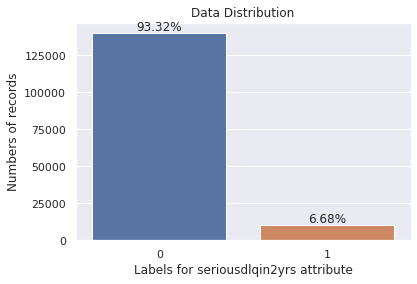

In [115]:
# Graphical representation of the target label percentage 

sns.set()
sns.countplot(training_data.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=12, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [116]:
# Missing value
# You will get to know which column has missing value and it's give the count that how many records are missing 
training_data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

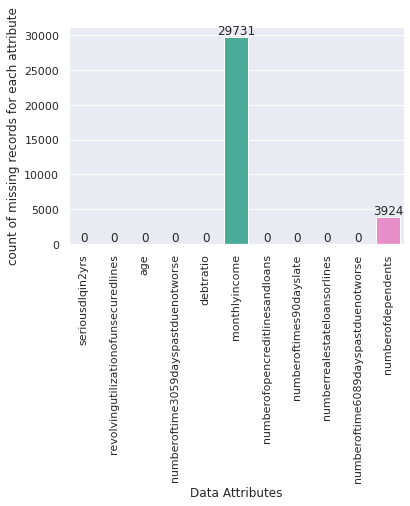

In [117]:

# Graphical representation of the missing values.
x = training_data.columns
y = training_data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=12, ha='center', va='bottom')
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [118]:
# Actual replacement of the missing value using mean value.
training_data_mean_replace = training_data.fillna((training_data.mean()))
training_data_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [120]:
# Actual replacement of the missing value using median value.
training_data_median_replace = training_data.fillna((training_data.median()))
training_data_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [123]:
# Correlation 
training_data.fillna((training_data.median()), inplace=True)
# Get the correlation of the training dataset
training_data[training_data.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.00,-0.01,-0.00,0.00,0.01,-0.01,-0.00,0.01,-0.00,0.00
age,-0.01,1.00,-0.06,0.02,0.03,0.15,-0.06,0.03,-0.06,-0.22
numberoftime3059dayspastduenotworse,-0.00,-0.06,1.00,-0.01,-0.01,-0.06,0.98,-0.03,0.99,-0.00
debtratio,0.00,0.02,-0.01,1.00,-0.02,0.05,-0.01,0.12,-0.01,-0.04
monthlyincome,0.01,0.03,-0.01,-0.02,1.00,0.09,-0.01,0.12,-0.01,0.07
numberofopencreditlinesandloans,-0.01,0.15,-0.06,0.05,0.09,1.00,-0.08,0.43,-0.07,0.07
numberoftimes90dayslate,-0.00,-0.06,0.98,-0.01,-0.01,-0.08,1.00,-0.05,0.99,-0.01
numberrealestateloansorlines,0.01,0.03,-0.03,0.12,0.12,0.43,-0.05,1.00,-0.04,0.13
numberoftime6089dayspastduenotworse,-0.00,-0.06,0.99,-0.01,-0.01,-0.07,0.99,-0.04,1.00,-0.01
numberofdependents,0.00,-0.22,-0.00,-0.04,0.07,0.07,-0.01,0.13,-0.01,1.00


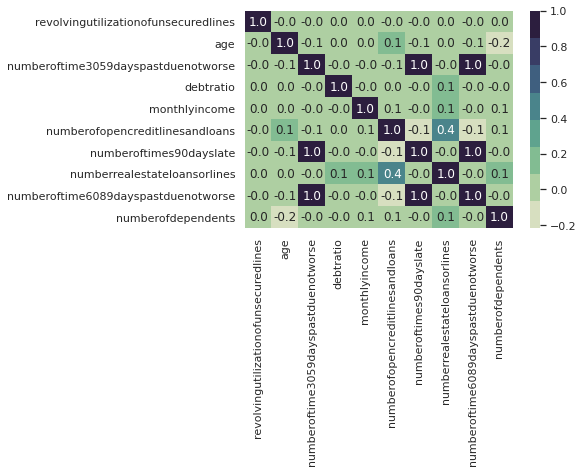

In [124]:
sns.set()
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f",
            cmap=(sns.cubehelix_palette(8, start=.5, rot=-.75)))
plt.show()

In [ ]:
# OUTLIER DETECTION 

In [125]:
# Percentile based outlier detection
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return ((data < minval) | (data > maxval))

# Another percentile based outlier detection method which is based on inter quertile(IQR) range
# import numpy as np
# def outliers_iqr(ys):
#     quartile_1, quartile_3 = np.percentile(ys, [25, 75])
#     iqr = quartile_3 - quartile_1
#     lower_bound = quartile_1 - (iqr * 1.5)
#     upper_bound = quartile_3 + (iqr * 1.5)
#     return np.where((ys > upper_bound) | (ys < lower_bound))

In [127]:
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median_y = np.median(points, axis=0)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]

    return modified_z_scores
mad_based_outlier(points=training_data.revolvingutilizationofunsecuredlines)

[array([2.78278459]),
 array([3.65145584]),
 array([2.29190495]),
 array([0.36210795]),
 array([3.42448596]),
 array([0.26828937]),
 array([0.68894439]),
 array([2.72974803]),
 array([-0.16930146]),
 array([0.15910712]),
 array([2.22844922]),
 array([-0.61564377]),
 array([-0.6540526]),
 array([3.68565955]),
 array([-0.61173997]),
 array([1.79295084]),
 array([-0.42334181]),
 array([0.05503917]),
 array([0.30755234]),
 array([2.0400419]),
 array([0.21255918]),
 array([-0.58445947]),
 array([3.84630838]),
 array([-0.35812946]),
 array([-0.48939717]),
 array([1.0825978]),
 array([-0.46267724]),
 array([-0.54459757]),
 array([1.35665969]),
 array([1.08599066]),
 array([2.50060425]),
 array([3.84630838]),
 array([-0.32178897]),
 array([0.14864576]),
 array([2.45174523]),
 array([-0.70112701]),
 array([3.30896727]),
 array([3.84630838]),
 array([0.95248603]),
 array([0.68352477]),
 array([2.57296]),
 array([-0.36962999]),
 array([1.43187889]),
 array([2.56713959]),
 array([0.97631263]),
 ar